# IE 7300 Project

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from scipy import optimize
from svm_utils  import *

In [2]:
onp = pd.read_csv('OnlineNewsPopularity.csv')
onp.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
onp.shape

(39644, 61)

In [4]:
onp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [5]:
onp.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
onp.columns=onp.columns.str.replace(" ","")

C:\Users\Amogha Shettar\AppData\Local\Temp\ipykernel_16432\2441228327.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot: >

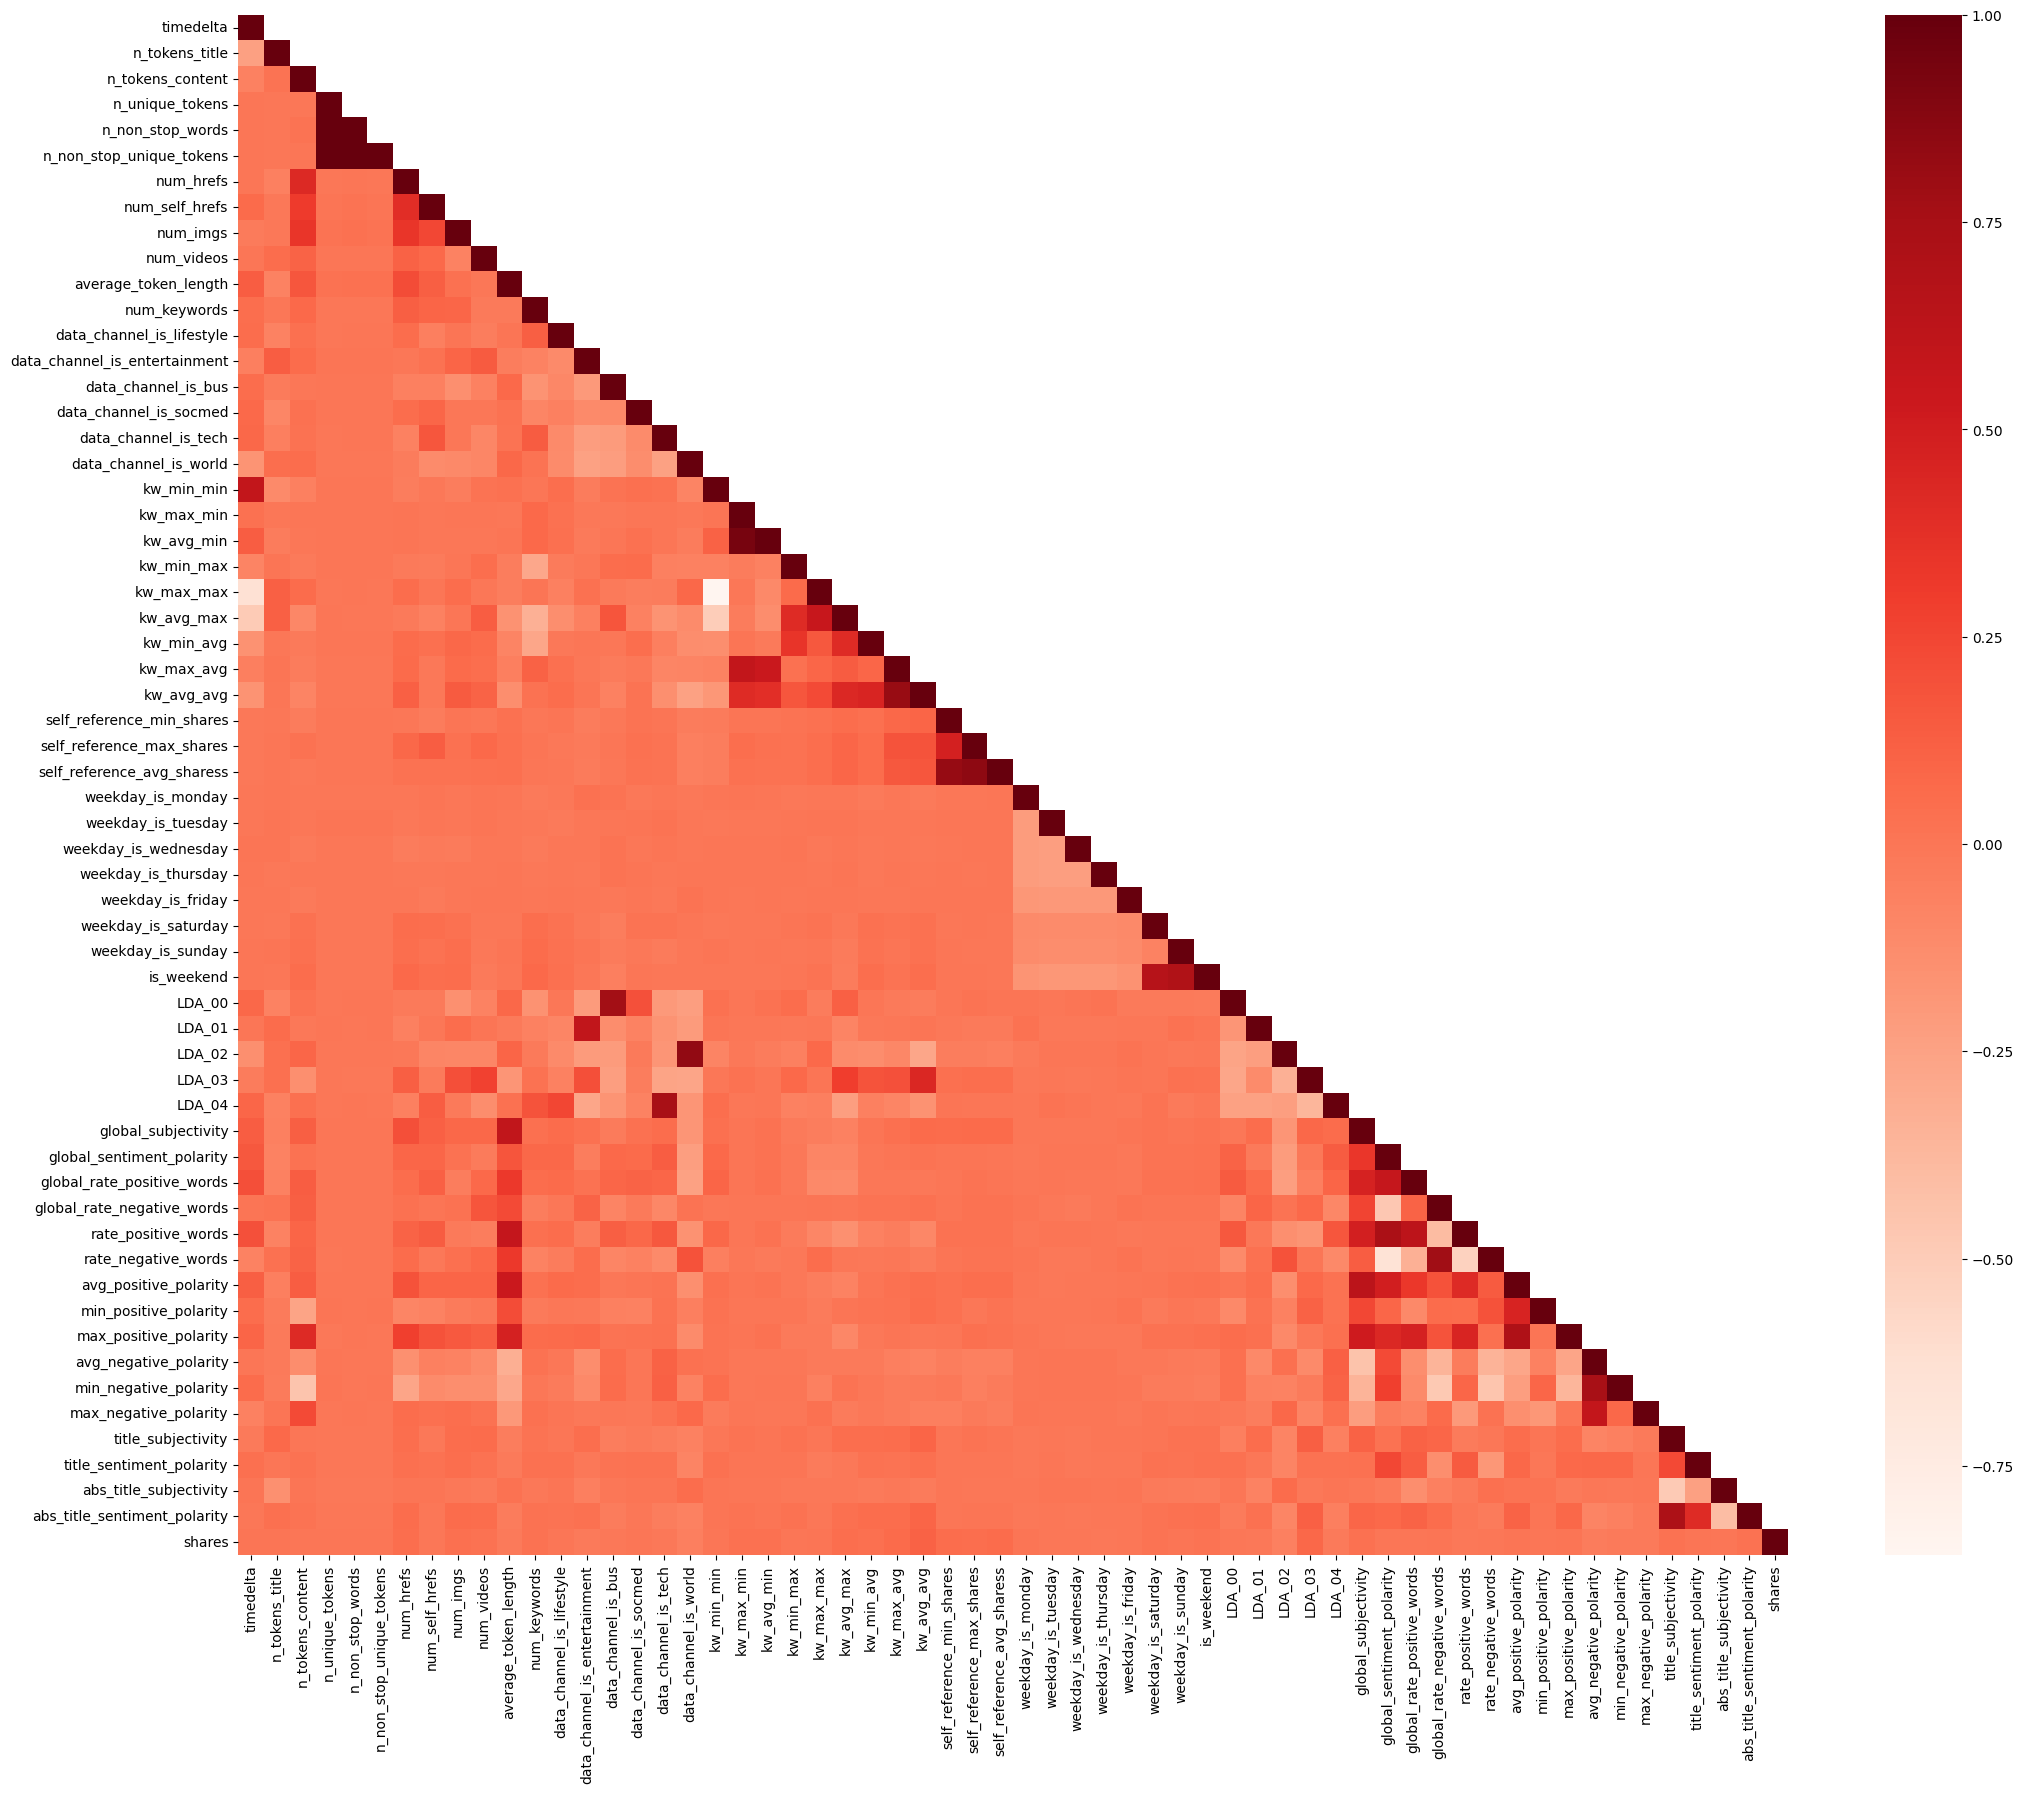

In [7]:
cor=onp.corr()
plt.figure(figsize=(25,20))
onp1 = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(onp1,cmap='Reds')

In [8]:
# Dropping:
# 'URL' as it is a non-numeric attribute and is not valuable to our analysis 
# 'timedelta' as it is not a feature, but a non-predictive attribute
# 'n_non_stop_words', 'n_non_stop_unique_tokens', 'kw_avg_min' as they are highly correlated attributes
onp = onp.drop('timedelta',axis=1)
onp = onp.drop('url',axis=1)
onp= onp.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

<AxesSubplot: >

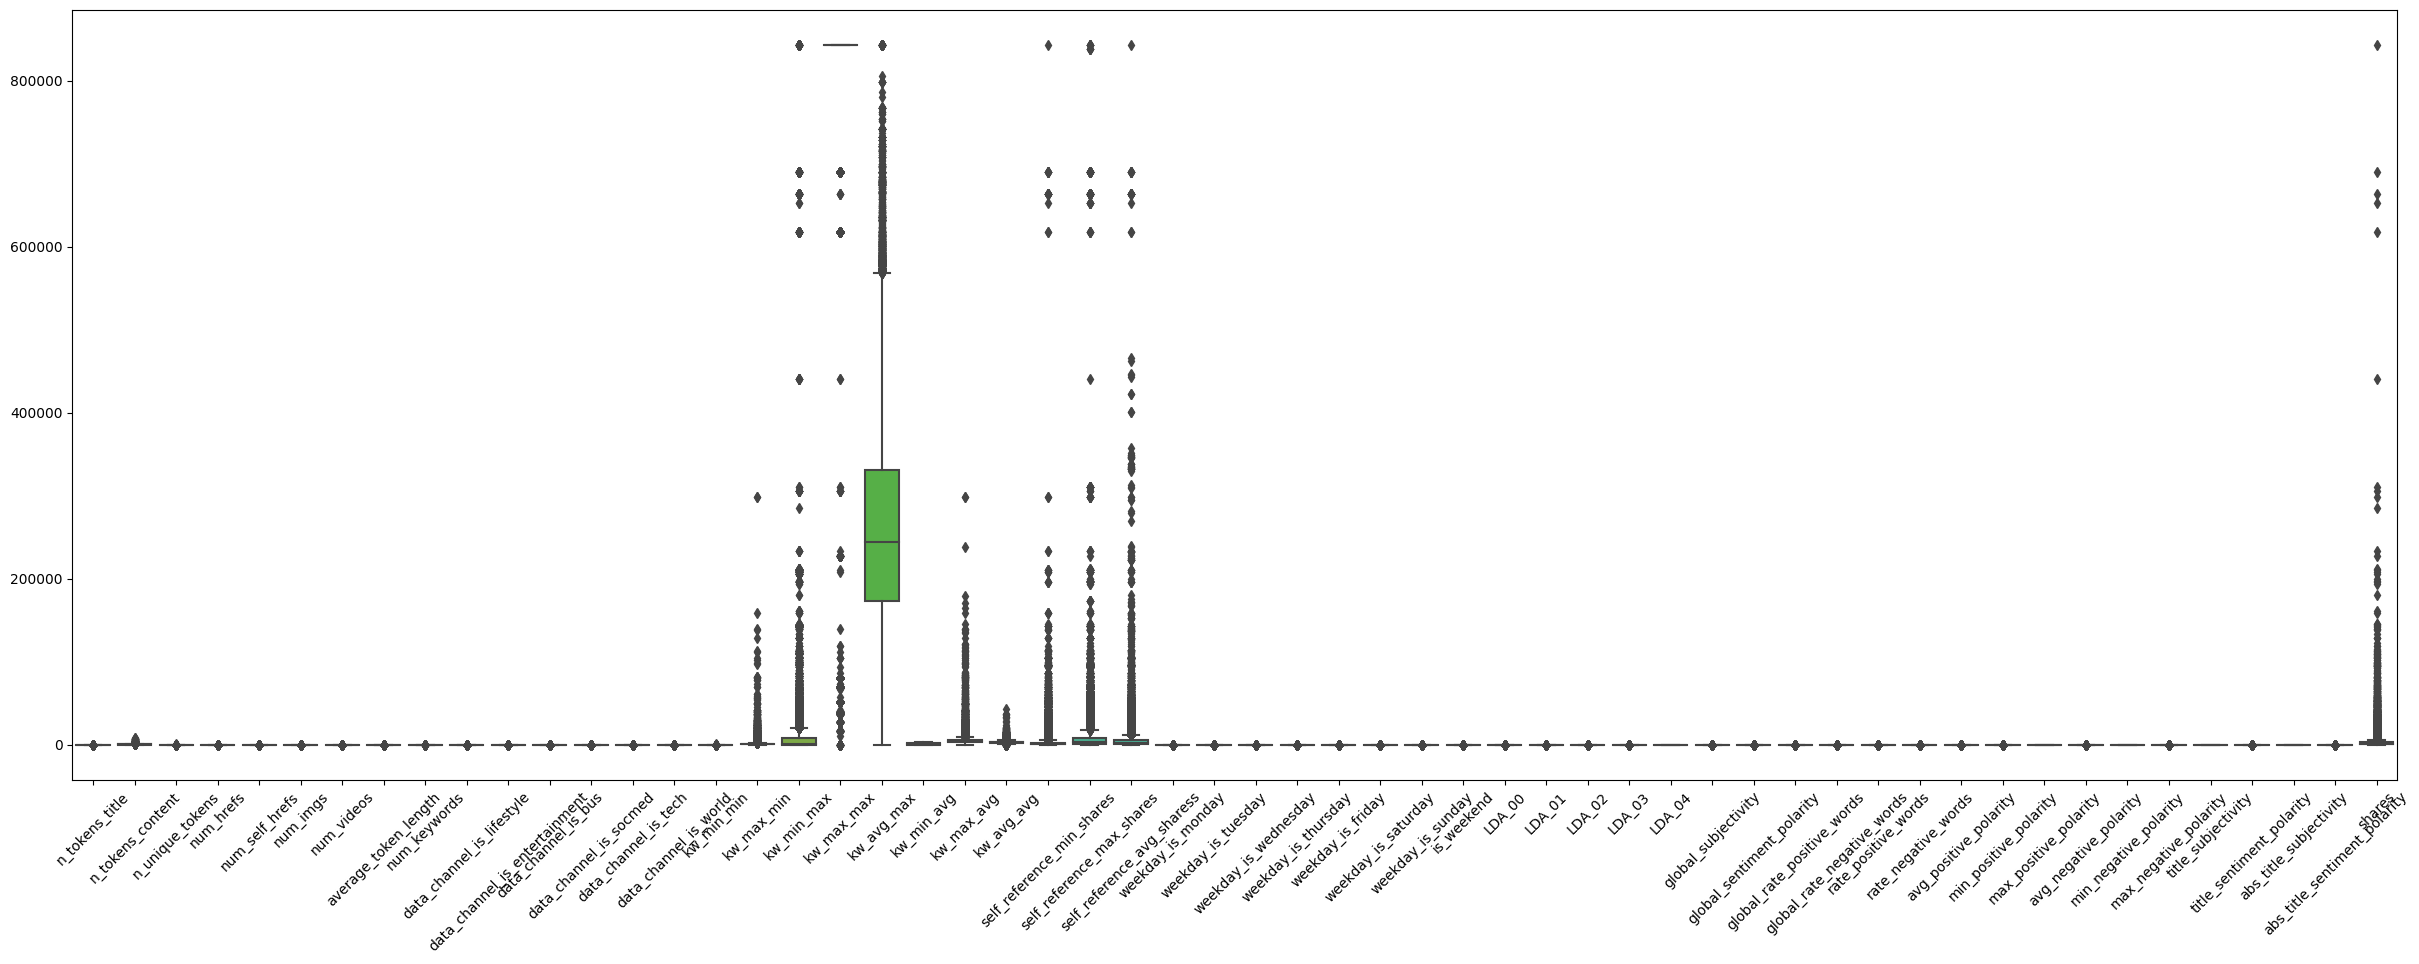

In [9]:
numerical = onp.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
#sns.boxplot(x='popularity',y=' num_imgs', hue='data_channel', data=temp_data, showfliers=False)
sns.boxplot(data = onp)

In [10]:
# numerical_onp  dataframe contains numerical feaures.

numerical_onp = onp.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# categorical_onp  dataframe contains numerical feaures.

categorical_onp = onp[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]


In [11]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

numerical_onp = numerical_onp.drop('shares',axis=1)

In [12]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [13]:
# Finding negative values.

negative_cols=numerical_onp.columns[(numerical_onp<=0).any()]
negative_cols

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

In [14]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negative_cols:
    m=numerical_onp[i].min()
    name=i +'_new'
    numerical_onp[name]=((numerical_onp[i]+1)-m)

In [15]:
numerical_onp.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_h

In [16]:
# Droping old negative column

for i in negative_cols:
    numerical_onp.drop(i,axis=1,inplace=True)

In [17]:
# Checking negative columns

negative_cols=numerical_onp.columns[(numerical_onp<=0).any()]
negative_cols

Index([], dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical_onp[:] = ss.fit_transform(numerical_onp)

In [19]:
def remove_outliers(array, k=1):
    ul = array.mean() + k*array.std()
    ll = array.mean() - k*array.std()
    array[array<ll] = ll
    array[array>ul] = ul
    return array

In [20]:
numerical_onp = numerical_onp.apply(remove_outliers)

<AxesSubplot: >

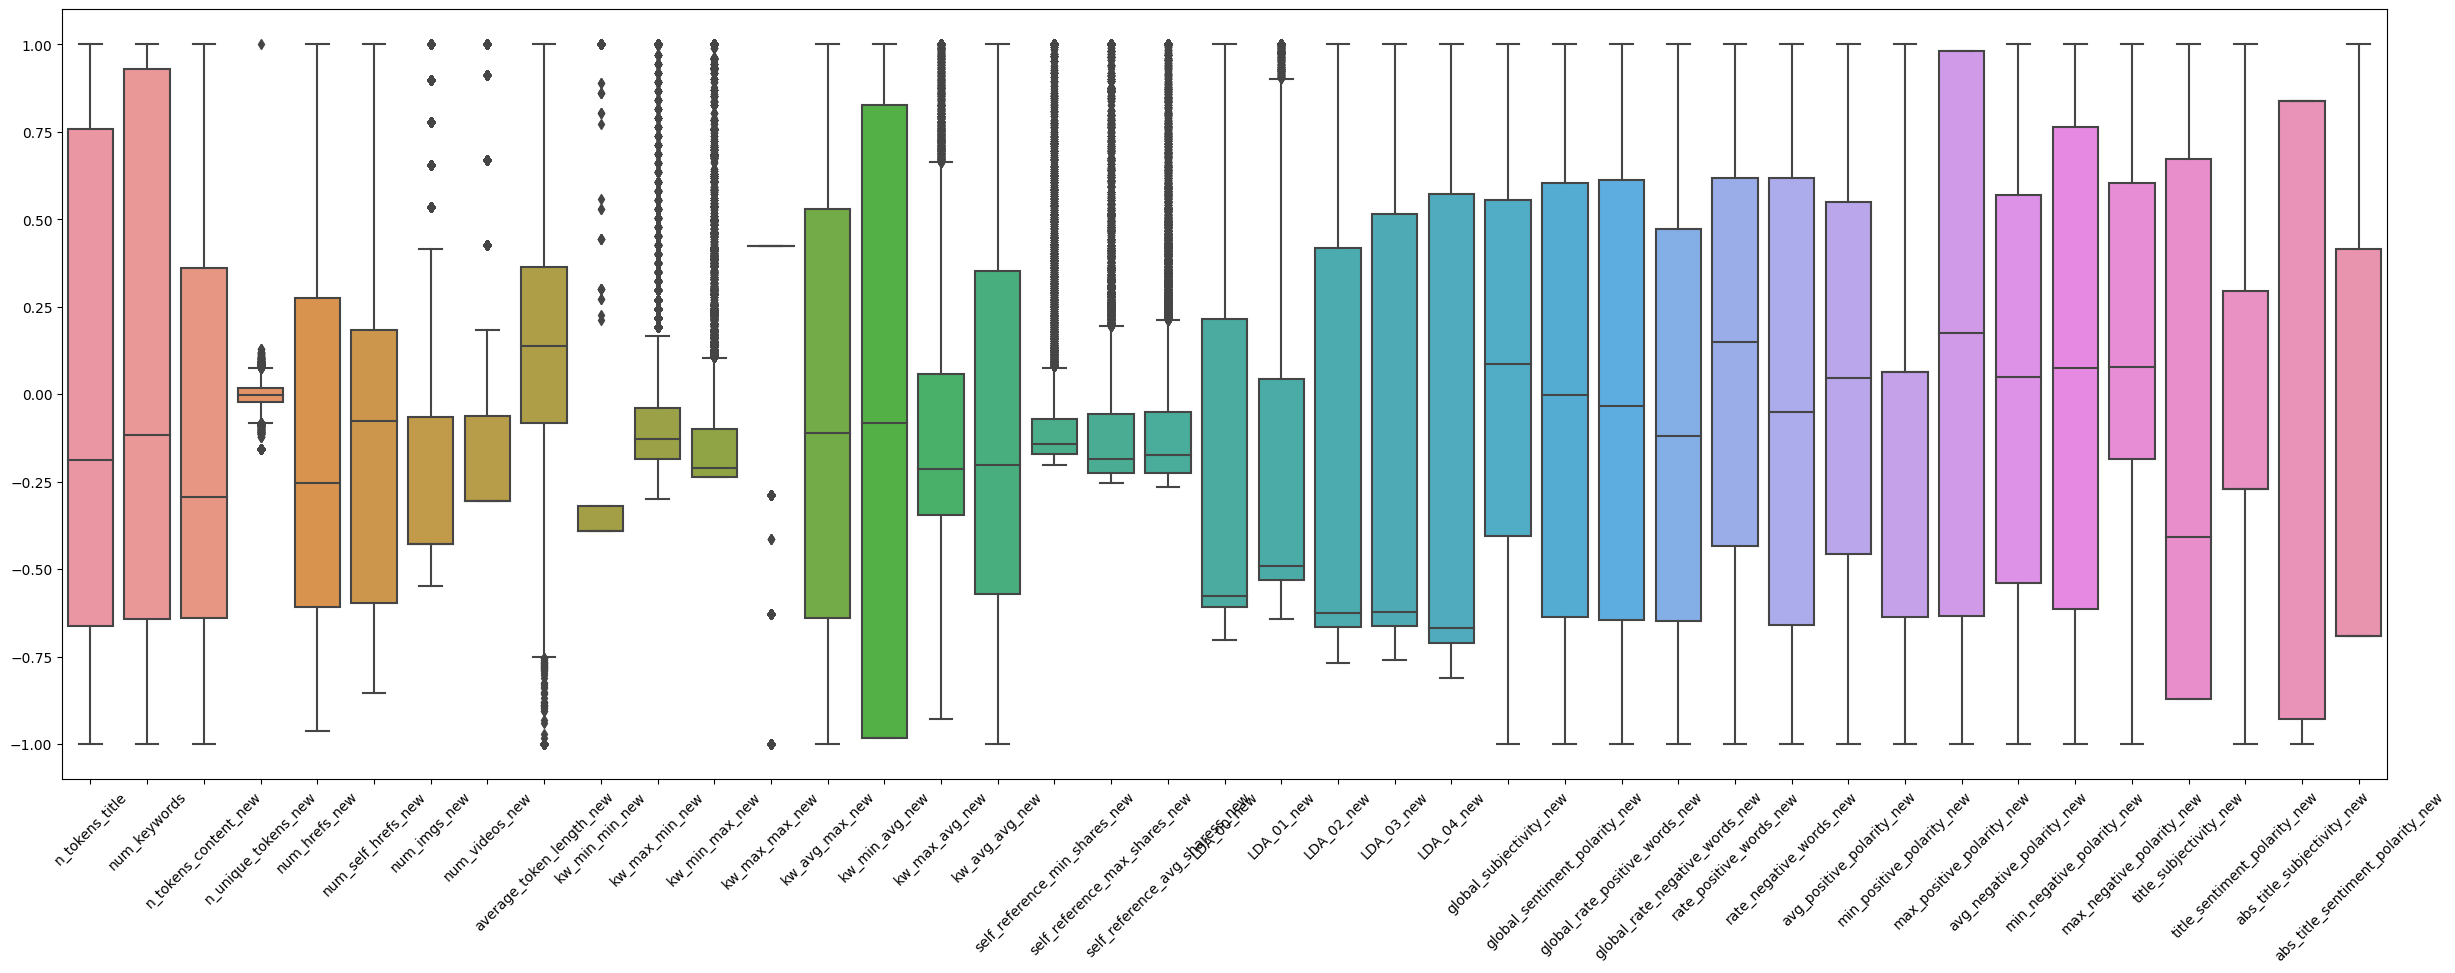

In [21]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
sns.boxplot(data = numerical_onp)

In [22]:
numerical_onp.columns

Index(['n_tokens_title', 'num_keywords', 'n_tokens_content_new',
       'n_unique_tokens_new', 'num_hrefs_new', 'num_self_hrefs_new',
       'num_imgs_new', 'num_videos_new', 'average_token_length_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_

In [23]:
categorical_onp.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [24]:
final_onp=pd.concat([numerical_onp,categorical_onp],axis=1)

In [25]:
final_onp.shape

(39644, 55)

In [26]:
final_onp['popularity'] = onp['shares'].apply(lambda x: 0 if x <1400 else 1)

In [27]:
final_onp.shape

(39644, 56)

In [28]:
X = final_onp.drop(['popularity'], axis = 1)
y = final_onp['popularity']

In [29]:
class LogisticRegression:
    
    def __init__(self, X, y, learningRate, tolerance, maxIteration, batchSize):
        
        self.X= X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.batchSize = batchSize
        
        
    def splitData(self):
        
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
        X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
        X_train = self.add_X0(X_train)
        X_valid = self.add_X0(X_valid)
        X_test = self.add_X0(X_test)
        return X_train, X_valid, X_test, y_train, y_valid, y_test

    
    # Normalizing the training dataset using Z-score
#     def normalize(self, X):
#         mean = np.mean(X, 0)
#         std = np.std(X, 0)
        
#         X_norm = (X-mean) / std
#         X_norm = self.add_X0(X_norm)
#         return X_norm, mean, std
    
    
#     def normalizeTestData(self, X, train_mean, train_std):
#         X_norm = (X - train_mean) / train_std
#         X_norm = self.add_X0(X_norm)
#         return X_norm
    
    
    def add_X0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
        
    def sigmoid(self,z):
        sig = 1 / ( 1 + np.exp(-z))
        return sig
    
    def predict(self,X):
        pred = self.sigmoid(X.dot(self.w))
        return np.around(pred)
    
    def costFunction(self, X, y):
        pred =np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred.sum( )
        return cost
    
    def gradient(self,X,y):
        sig = self.sigmoid(X.dot(self.w))
        # sig = self.sigmoid(self.predict(X))
        grad = (sig -y ).dot(X)
        return grad
    
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in range(self.maxIteration):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            curr = self.costFunction(X,y)
            
            diff = last - curr
            #last - curr
            last = curr
            
            errors.append(curr)
            
            if diff < self.tolerance:
                print("The model stopped Learning")
                break
        # self.plot_cost(errors)

    def stochasticGD(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
        XY = np.c_[X.reshape(X.shape[0], X.shape[1]), y.reshape(X.shape[0], 1)]
        
        
        # Set seed
        np.random.seed(2022)
        errors = []
        
        for i in tqdm(range(self.maxIteration)):
                    
        # Shuffle x and y
            np.random.shuffle(XY)

            start = 0
            stop = start + self.batchSize
            X_batch, y_batch = XY[start:stop, :-1], XY[start:stop, -1]

          
            last_error = float('inf')

          # Recalculating the difference
            self.w = self.w - self.learningRate * self.gradient(X_batch, y_batch)
            current_error = self.costFunction(X, y)
         
            diff = last_error - current_error
            last_error = current_error

            errors.append(current_error)
            if np.abs(diff) < self.tolerance:
                print('Model stopped learning')
                break
        
        print(self.w)
        
        
    def evaluate(self, y, y_hat):
        
        y = (y == 1)
        y_hat = (y_hat == 1)
        
        #accuracy = np.sum(np.equal(y_true, y_hat)) / len(y_true)
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum() / y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()

        
        return accuracy, precision, recall
    
    def fit(self):

        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        self.w = np.dot(np.ones(X_train.shape[1], dtype = np.float64), 0)
        self.stochasticGD(X_train, y_train)
        # self.gradientDescent(X_train, y_train)
        y_hat_train = self.predict(X_train)
        recall, precision, accuracy = self.evaluate(y_train,y_hat_train)
        return accuracy, precision, recall
        
    def validation(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_valid = self.predict(X_valid)

        recall, precision, accuracy  = self.evaluate(y_valid, y_hat_valid)
        return accuracy, precision, recall

    def test(self):
        X_train, X_valid, X_test, y_train, y_valid, y_test = self.splitData()
        y_hat_test = self.predict(X_test)
        recall, precision, accuracy  = self.evaluate(y_test, y_hat_test)
        return accuracy, precision, recall

In [30]:
lr = LogisticRegression(X = final_onp.values[:, 0:-1], y = final_onp.values[:, -1], learningRate = 0.0001, tolerance = 0.0001, maxIteration = 100, batchSize=32)
log_base_train_acc = lr.fit()
log_base_valid_acc = lr.validation()
log_base_test_acc = lr.test()
display(log_base_train_acc, log_base_valid_acc, log_base_test_acc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 49.93it/s]


[ 0.00941027 -0.00319003  0.00963616  0.0048198  -0.00050726  0.00683122
  0.00267071  0.0043821  -0.00131652 -0.00241654  0.00131491  0.00155975
  0.00013874 -0.00270162 -0.0010814   0.00370828  0.00753859  0.01571394
  0.00419365  0.00441745  0.00538284  0.00706193 -0.00743195 -0.01500786
  0.00079182  0.0120611   0.00783386  0.00763413  0.00669862 -0.00375186
  0.00757952 -0.00805612  0.00246506 -0.00677751  0.00683406  0.00070486
 -0.00074642  0.00192232  0.00215533  0.00303095 -0.0014543   0.00357961
  0.00059492 -0.0021359  -0.00080455  0.00111799  0.00266685  0.00434349
  0.00362747  0.00797096  0.00180979 -0.00707139  0.00300748  0.00458089
  0.00956118 -0.00706852]


(0.6725856436887512, 0.6360899873257287, 0.616981981981982)

(0.6717032967032966, 0.6139359698681732, 0.6061261261261262)

(0.6642868475329208, 0.6214932462520409, 0.6077013620312762)

In [31]:
class MaxMarginClassifier:
    
    def __init__(self, C):
        
#         self.X = X
#         self.y = y
        self.alpha = None
        self.w = None
        self.C = C 
    
    
#     def splitData(self):
        
#         X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=42)
#         return X_train, X_test, y_train, y_test
    
    
    def fit(self, X, y):
        
#         X_train, X_test, y_train, y_test = self.splitData()
        N = len(y)
        #Gram matrix
        Xy = X*y[:, np.newaxis] # newmatrix converts a vector into matrix
        GramXy = np.matmul(Xy, Xy.T)
        
        
        
        def Ld0(G, alpha):
            obj_fn = alpha.sum() - 0.5*alpha.dot(alpha.dot(G))
            return obj_fn
        
        def partialDerivativeLd0(G, alpha):
            par_der = np.ones_like(alpha) - alpha.dot(G)
            return par_der
    
        #initialize x0 = alphas
          
        alpha = np.ones(N)
        A = np.vstack((-np.eye(N), np.eye(N)))
        b = np.concatenate((np.zeros(N), self.C * np.ones(N)))

        constraints = ({'type': 'eq', 'fun': lambda a: np.dot(a,y), 'jac': lambda a:y},
                       {'type': 'ineq', 'fun': lambda a: b-np.dot(A,a), 'jac': lambda a:-A})




        optRes = optimize.minimize(fun = lambda a: -Ld0(GramXy, a),
                                   x0 = alpha,
                                   jac = lambda a: -partialDerivativeLd0(GramXy, a),
                                   constraints = constraints
                                   )

        self.alpha = optRes.x

        self.w = np.sum((self.alpha[:, np.newaxis] * Xy), axis = 0)

        epsilon = 1e-4    
        self.supportVectors = X[self.alpha > epsilon]
        self.supportLabels = y[self.alpha > epsilon]

        b = []
        for i in range(len(self.supportLabels)):
            b_i = self.supportLabels[i] - np.matmul(self.supportVectors[i].T, self.w)
            b.append(b_i)
        self.b = sum(b)/len(b)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [33]:
model = MaxMarginClassifier(C = 5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.w

In [ ]:
model.b

In [ ]:
fig, ax = plt.subplots(1, figsize = (12,7))
plotSvm(xTrain, yTrain, model.supportVectors, model.w, model.b, label = 'training', ax = ax)

In [32]:
X_train_arr = np.asarray(X_train)
y_train_arr = np.asarray(y_train)
X_valid_arr = np.asarray(X_valid)
y_valid_arr = np.asarray(y_valid)
X_test_arr = np.asarray(X_test)
y_test_arr = np.asarray(y_test)

In [33]:
class SVM:
    def __init__(self, learningRate=0.0001, lambda_=0.001, nIterations=1000):
        self.learningRate = learningRate
        self.lambda_ = lambda_
        self.nIterations = nIterations
        
    def fit(self, X, y):
        nSamples, nFeatures = X.shape
        self.w = np.zeros(nFeatures)
        self.b = 0
        
        # Gradient Descent
        # Cost function
            # 
        # Gradient
            # y_i*(wx_i + b) >= 1, then d_w = 2*lambda_*w 
            # otherwise, then d_w = 2*lambda_*w - y_i*x_i,  d_b = -y_i
        for i in range(self.nIterations):
            for idx, x_i in enumerate(X):
                condtions = y[idx] * np.dot(self.w, x_i + self.b)
                if condtions >= 1:
                    # only for w
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w)
                else:
                    # update both w and b
                    self.w = self.w -self.learningRate * (2 * self.lambda_ * self.w - np.dot(y[idx], x_i))
                    self.b = self.b - self.learningRate * (-y[idx])
    
    def predict(self, X):
        pred_ = np.dot(X, self.w) + self.b
        return np.sign(pred_)

In [34]:
svm_hard = SVM()
svm_hard.fit(X_train_arr, y_train_arr)

In [35]:
svm_hard.w

array([ 0.00039247,  0.00029031, -0.00336726, -0.00214883,  0.00088641,
       -0.00131218,  0.00048065, -0.00119099,  0.00351069, -0.00079946,
       -0.00075658, -0.00550453, -0.00186631,  0.00066564, -0.00013519,
       -0.00105915,  0.00391532, -0.00108926, -0.00231839,  0.00238962,
       -0.00985201, -0.00734418, -0.00968817, -0.00082254, -0.00921481,
       -0.00012782, -0.00354457,  0.00014031,  0.00138929,  0.00223703,
       -0.00136145,  0.0014007 , -0.00135744,  0.0015113 , -0.00143262,
        0.000788  ,  0.00140802,  0.00266785,  0.00052566,  0.00154815,
       -0.00106773,  0.05654583,  0.0552356 ,  0.05540211,  0.05595812,
        0.05638266,  0.01942818,  0.02065051,  0.04007868,  0.01600138,
        0.01679106,  0.01767869,  0.01722415,  0.01829827,  0.01829974])

In [36]:
svm_hard.b

2.2233000000002674

In [37]:
svm_hard.predict(X_test_arr)

array([1., 1., 1., ..., 1., 1., 1.])

In [39]:
svm_hard_train_accuracy = np.sum(svm_hard.predict(X_train_arr) == y_train_arr) / np.size(y_train_arr)
svm_hard_valid_accuracy = np.sum(svm_hard.predict(X_valid_arr) == y_valid_arr) / np.size(y_valid_arr)
svm_hard_test_accuracy = np.sum(svm_hard.predict(X_test_arr) == y_test_arr) / np.size(y_test_arr)
svm_hard_test_accuracy

0.5299310576761392

In [ ]:
class SMO():
    def __init__(self, max_iter=100, kernel_type='linear', C=1.0, epsilon=1e-4):
        self.kernels = {
            'linear' : self.kernel_linear,
            'poly' : self.kernel_poly,
            'rbf' : self.kernel_rbf
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon

    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X.values[i,:], X.values[j,:], y.values[i], y.values[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]

        return support_vectors, count

    def predict(self, X):
        return self.h(X, self.w, self.b)

    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)

    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))

    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)

    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k

    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))

    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = np.random.randint(a,b)
            cnt=cnt+1
        return i

    def kernel_linear(self, x, z):
        return np.dot(x, z.T)

    def kernel_poly(self, x, z):
        return (np.dot(x, z.T) ** 2)

    def kernel_rbf(self, x, z, sigma=1):
        return np.exp(- (np.linalg.norm(x - z, 2)) ** 2 / (2 * sigma ** 2))

    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b

In [ ]:
model = SMO(C=5)

model.fit(X_train, y_train)